# Welcome


This is the legendary Kaggle Titanic ML competition.

The competition is : use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.



## The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. 
Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. 
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, asked me to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


## The Data

### 1. train.csv 

'train.csv' contains the details of a subset of the passengers on board (891 passengers, to be exact -- where each passenger gets a different row in the table).

The values in the second column ("Survived") can be used to determine whether each passenger survived or not:

- if it's a "1", the passenger survived.
- if it's a "0", the passenger died.

For instance, the first passenger listed in train.csv is Mr. Owen Harris Braund. He was 22 years old when he died on the Titanic.

### 2. test.csv

I have to predict whether the other 418 passengers on board (in test.csv) survived.

Note that: test.csv does not have a "Survived" column - this information is hidden, and the success rate in guessing these hidden values will determine how high I score in the competition.

### 3. gender_submission.csv

The gender_submission.csv file is provided as an example that shows how I should structure mypredictions. It predicts that all female passengers survived, and all male passengers died. My hypotheses regarding survival will probably be different, which will lead to a different submission file. But, just like this file, My submission will have:

-  "PassengerId" column containing the IDs of each passenger from test.csv.
-  "Survived" column (that I will create!) with a "1" for the rows where I think the passenger survived, and a "0" where I predict that the passenger died.

*********************************

Columns:

- ***passengerid:***  Passenger Number
- ***survived:***  Survival (0 = No; 1 = Yes)
- ***pclass:***  Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- ***name:***  Name
- ***sex:***  (Female, Male)
- ***age:***  Age
- ***sibsp:***  Number of Siblings/Spouses Aboard
- ***parch:***  Number of Parents/Children Aboard
- ***ticket:***  Ticket Number
- ***fare:***  Passenger Fare
- ***cabin:***  Cabin
- ***embarked:***  Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## 1. Exploratory Data Analysis

- Importing Modules
- Loading Dataset
- Data Insigts
----------
Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

In [1]:
# 1-Import Libraies

import pandas_profiling
import pyforest

import ipywidgets
from ipywidgets import interact

import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker
#import squarify as sq


import plotly 
import plotly.express as px
import cufflinks as cf
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


from wordcloud import WordCloud

import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint
import scipy.stats as stats
from scipy.cluster.hierarchy import linkage, dendrogram
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 

import datetime as dt
from datetime import datetime

from pyclustertend import hopkins

import optuna

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve 
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_validate

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, scale, StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, PowerTransformer  
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree 

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBRegressor, XGBClassifier, plot_importance

# Ignore Warnings

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")


# Figure&Display options

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

C:\Users\Enes\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Enes\anaconda3\lib\site-packages\numpy\.libs\libopenblas.gk7gx5keq4f6uyo3p26ulgbqyhgqo7j4.gfortran-win_amd64.dll
C:\Users\Enes\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending = False)
    missing_percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
    missing_values = pd.concat([missing_number, missing_percent], axis = 1, keys = ['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number'] > 0]

In [3]:
def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n', 
          colored('*'*100, 'red', attrs = ['bold']),
          colored("\nInfo:\n", attrs = ['bold']), sep = '')
    print(df.info(), '\n', 
          colored('*'*100, 'red', attrs = ['bold']), sep = '')
    print(colored("Number of Uniques:\n", attrs = ['bold']), df.nunique(),'\n',
          colored('*'*100, 'red', attrs = ['bold']), sep = '')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('*'*100, 'red', attrs = ['bold']), sep = '')
    print(colored("All Columns:", attrs = ['bold']), list(df.columns),'\n', 
          colored('*'*100, 'red', attrs = ['bold']), sep = '')

    df.columns = df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')
    print(colored("Columns after rename:", attrs = ['bold']), list(df.columns),'\n',
          colored('*'*100, 'red', attrs = ['bold']), sep = '')  
    print(colored("Columns after rename:", attrs = ['bold']), list(df.columns),'\n',
          colored('*'*100, 'red', attrs = ['bold']), sep = '')
    print(colored("Descriptive Statistics \n", attrs = ['bold']), df.describe().round(2),'\n',
          colored('*'*100, 'red', attrs = ['bold']), sep = '') # Gives a statstical breakdown of the data.
    print(colored("Descriptive Statistics (Categorical Columns) \n", attrs = ['bold']), df.describe(include = object).T,'\n',
          colored('*'*100, 'red', attrs = ['bold']), sep = '') # Gives a statstical breakdown of the data.

In [4]:
def multicolinearity_control(df):
    feature = []
    collinear = []
    for col in df.corr().columns:
        for i in df.corr().index:
            if (abs(df.corr()[col][i]) > .9 and abs(df.corr()[col][i]) < 1):
                    feature.append(col)
                    collinear.append(i)
                    print(colored(f"Multicolinearity alert in between:{col} - {i}", 
                                  "red", attrs = ['bold']), df.shape,'\n',
                                  colored('*'*100, 'red', attrs = ['bold']), sep = '')

In [5]:
def duplicate_values(df):
    print(colored("Duplicate check...", attrs = ['bold']), sep = '')
    print("There are", df.duplicated(subset = None, keep = 'first').sum(), "duplicated observations in the dataset.")
    duplicate_values = df.duplicated(subset = None, keep = 'first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep = 'first', inplace = True)
        print(duplicate_values, colored(" Duplicates were dropped!"),'\n',
              colored('*'*100, 'red', attrs = ['bold']), sep = '')

In [6]:
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i] / df.shape[0]*100) > limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis = 1, inplace = True)
            print('new shape:', df.shape)       
    print('New shape after missing value control:', df.shape)

In [7]:
def first_look(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("Per_of_Nulls   : ", "%", round(df[col].isnull().sum() / df.shape[0]*100, 2))
    print("Num_of_Nulls   : ", df[col].isnull().sum())
    print("Num_of_Uniques : ", df[col].nunique())
    print("Duplicates     : ", df.duplicated(subset = None, keep = 'first').sum())
    print(df[col].value_counts(dropna = False))

In [8]:
def fill_most(df, group_col, col_name):
    '''Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col] == group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna = False))

In [9]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

### Loading Dataset

Let's first load the required datasets using pandas's "train_csv", "test.csv", and "gender_submission.csv" function.

In [10]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender_sub = pd.read_csv("gender_submission.csv")

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [12]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000,0,0,240276,9.688,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.662,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.287,NaN,S


In [13]:
gender_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [14]:
first_looking(train)

Shape:(891, 12)
****************************************************************************************************
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
****************************************************************************************************
Number of Uniq

In [15]:
first_looking(test)

Shape:(418, 11)
****************************************************************************************************
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
****************************************************************************************************
Number of Uniques:
PassengerId    418
Pclass           3

In [16]:
test.drop(columns = ['passengerid','name', 'ticket', 'cabin'], axis = 1, inplace=True)

In [17]:
test.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'], dtype='object')

In [18]:
test.isnull().sum()

pclass       0
sex          0
age         86
sibsp        0
parch        0
fare         1
embarked     0
dtype: int64

In [19]:
test[test['fare'].isnull()]

,pclass,sex,age,sibsp,parch,fare,embarked
152,3,male,60.500,0,0,NaN,S


In [20]:
test['fare'].mean()

35.6271884892086

In [21]:
test['fare'].fillna(test['fare'].mean(),inplace = True)

In [22]:
test['fare'].isnull().sum()

0

In [23]:
test['age'].fillna(test['age'].mean(),inplace = True)

In [24]:
test['age'].isnull().sum()

0

In [25]:
test.duplicated().sum()

38

In [26]:
test1 = test.copy()

In [27]:
test1['sex'].replace('male', 1,inplace=True)
test1['sex'].replace('female', 0, inplace=True)
test1.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,34.500,0,0,7.829,Q
1,3,0,47.000,1,0,7.000,S
2,2,1,62.000,0,0,9.688,Q
3,3,1,27.000,0,0,8.662,S
4,3,0,22.000,1,1,12.287,S


In [28]:
test1 = pd.get_dummies(test1, columns = ['embarked'], drop_first = True)
test1.head(1)

,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S
0,3,1,34.500,0,0,7.829,1,0


### According to the basic examinations on the dataset;

- We have a classification problem.
- We are going to make classification on the target variable "Survived".
- And we will build a model to get the best classification on the "Survived" column.
- Because of that we are going to look at the balance of "Survived" column.
- The dataset has 12 columns and 891 observations after dropping of duplicated observations.
- 7 columns contain numerical values and 5 columns contain categorical values.
- There seems to be missing value.

In [29]:
type(np.NaN)

float

In [30]:
train.age

0     22.000
1     38.000
2     26.000
3     35.000
4     35.000
5        NaN
6     54.000
7      2.000
8     27.000
9     14.000
10     4.000
11    58.000
12    20.000
13    39.000
14    14.000
15    55.000
16     2.000
17       NaN
18    31.000
19       NaN
20    35.000
21    34.000
22    15.000
23    28.000
24     8.000
25    38.000
26       NaN
27    19.000
28       NaN
29       NaN
30    40.000
31       NaN
32       NaN
33    66.000
34    28.000
35    42.000
36       NaN
37    21.000
38    18.000
39    14.000
40    40.000
41    27.000
42       NaN
43     3.000
44    19.000
45       NaN
46       NaN
47       NaN
48       NaN
49    18.000
50     7.000
51    21.000
52    49.000
53    29.000
54    65.000
55       NaN
56    21.000
57    28.500
58     5.000
59    11.000
60    22.000
61    38.000
62    45.000
63     4.000
64       NaN
65       NaN
66    29.000
67    19.000
68    17.000
69    26.000
70    32.000
71    16.000
72    21.000
73    26.000
74    32.000
75    25.000
76       NaN

In [31]:
train['age'].fillna(train['age'].mean(),inplace = True)

In [32]:
train.age.isnull().sum()

0

In [33]:
train.cabin.mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [34]:
# Missing Values:
#          Missing_Number  Missing_Percent
# Cabin                687         0.771044 

# cabin's rate of missing of values quite high. Thus, I have to drop this column.

In [35]:
train.drop(axis = 1, columns='cabin', inplace=True)

In [36]:
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

In [37]:
train.embarked.sample(20)

275    S
120    S
840    S
600    S
388    Q
325    C
3      S
393    C
513    C
739    S
647    C
581    C
6      S
730    S
273    C
810    S
531    C
438    S
523    C
423    S
Name: embarked, dtype: object

In [38]:
train[train['embarked'].isnull()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.000,0,0,113572,80.000,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.000,0,0,113572,80.000,NaN


In [39]:
train['embarked'].replace(np.nan,'S',inplace=True)

In [40]:
train['embarked'].isnull().sum()

0

In [41]:
train[train['embarked'].isnull()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked


In [42]:
train.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
dtype: int64

### Data Insights

In the given datasets, we have two types of people one who survived and another who died in the wreck. So, we can divide data into two groups and compare their characteristics. Here, we can find the average of both the groups using groupby() and mean() function.

***'survived' Column is Target Column***

In [43]:
def first_look(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("Per_of_Nulls   : ", "%", round(train[col].isnull().sum() / train.shape[0]*100, 2))
    print("Num_of_Nulls   : ", train[col].isnull().sum())
    print("Num_of_Uniques : ", train[col].nunique())
    print("Duplicates     : ", train.duplicated(subset = None, keep = 'first').sum())
    print(train[col].value_counts(dropna = False))

In [44]:
cprint =("Let's First Look to 'survived' Column",'blue')
first_look('survived')

column name    :  survived
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  2
Duplicates     :  0
0    549
1    342
Name: survived, dtype: int64


In [45]:
fig = px.pie(train, values = train['survived'].value_counts(), 
             names = (train['survived'].value_counts()).index, 
             title = '"survived" Column Distribution')
fig.show()

- 'survived' column has binary type values.
- We have an balanced data.
- Almost 38% of the people have managed to survive.
- 342 people have survived.
- Almost 62% of the people could not managed to survive.
- 549 people have died.

In [46]:
train.groupby('survived').mean()

,passengerid,pclass,age,sibsp,parch,fare
survived,,,,,,
0,447.016,2.532,30.415,0.554,0.330,22.118
1,444.368,1.950,28.550,0.474,0.465,48.395


In [47]:
# Dataset describe results according to the "survived==1" condition

In [48]:
train[train['survived'] == 1].describe().T.style.background_gradient(subset = ['mean','min','50%', 'max'], cmap = 'RdPu')

,count,mean,std,min,25%,50%,75%,max
passengerid,342.000000,444.368421,252.358840,2.000000,250.750000,439.500000,651.500000,890.000000
survived,342.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
pclass,342.000000,1.950292,0.863321,1.000000,1.000000,2.000000,3.000000,3.000000
age,342.000000,28.549778,13.772498,0.420000,21.000000,29.699118,35.000000,80.000000
sibsp,342.000000,0.473684,0.708688,0.000000,0.000000,0.000000,1.000000,4.000000
parch,342.000000,0.464912,0.771712,0.000000,0.000000,0.000000,1.000000,5.000000
fare,342.000000,48.395408,66.596998,0.000000,12.475000,26.000000,57.000000,512.329200


In [49]:
# Dataset describe results according to the "survived==0" condition

In [50]:
train[train['survived'] == 0].describe().T.style.background_gradient(subset = ['mean','min','50%', 'max'], cmap = 'RdPu')

,count,mean,std,min,25%,50%,75%,max
passengerid,549.000000,447.016393,260.640469,1.000000,211.000000,455.000000,675.000000,891.000000
survived,549.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pclass,549.000000,2.531876,0.735805,1.000000,2.000000,3.000000,3.000000,3.000000
age,549.000000,30.415100,12.457370,1.000000,23.000000,29.699118,35.000000,74.000000
sibsp,549.000000,0.553734,1.288399,0.000000,0.000000,0.000000,1.000000,8.000000
parch,549.000000,0.329690,0.823166,0.000000,0.000000,0.000000,0.000000,6.000000
fare,549.000000,22.117887,31.388207,0.000000,7.854200,10.500000,26.000000,263.000000


In [51]:
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

***'pclass' Column***

In [52]:
first_look('pclass')

column name    :  pclass
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  3
Duplicates     :  0
3    491
1    216
2    184
Name: pclass, dtype: int64


In [53]:
pd.crosstab(train['pclass'], train['survived']).iplot(kind='bar', title = 'pclass and survived')

In [54]:
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

***'sex' column***

In [55]:
first_look('sex')

column name    :  sex
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  2
Duplicates     :  0
male      577
female    314
Name: sex, dtype: int64


In [56]:
pd.crosstab(train['sex'], train['survived']).iplot(kind='bar', title = 'sex and survived')

In [57]:
# I wanted to show that surviving and gender conditions have strong relationship in the graph.     

In [58]:
train.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [59]:
# Rate of Female Survive is % 74.2
# Rate of Male Survive is % 18.8 

In [60]:
fig = px.strip(train, x = 'pclass', y = 'sex', color = 'survived',
               title = "'pclass' & 'sex'")
fig.show()

In [61]:
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

In [62]:
# 'age' column

In [63]:
first_look('age')

column name    :  age
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  89
Duplicates     :  0
29.699    177
24.000     30
22.000     27
18.000     26
28.000     25
30.000     25
19.000     25
21.000     24
25.000     23
36.000     22
29.000     20
35.000     18
32.000     18
26.000     18
27.000     18
31.000     17
16.000     17
34.000     15
20.000     15
23.000     15
33.000     15
39.000     14
40.000     13
17.000     13
42.000     13
45.000     12
38.000     11
4.000      10
2.000      10
50.000     10
44.000      9
47.000      9
48.000      9
54.000      8
9.000       8
1.000       7
51.000      7
37.000      6
52.000      6
41.000      6
3.000       6
14.000      6
49.000      6
58.000      5
15.000      5
43.000      5
62.000      4
56.000      4
8.000       4
60.000      4
11.000      4
5.000       4
6.000       3
7.000       3
65.000      3
61.000      3
46.000      3
10.000      2
64.000      2
13.000      2
63.000      2
0.750 

In [64]:
train['age'].value_counts().iplot(kind="bar", title = '"age" Column Distribution')


In [65]:
pd.crosstab(train['age'], train['survived']).iplot(kind='bar', title = 'age and survived')

In [66]:
fig = px.strip(train[train['age'] == 29], x = 'pclass', y = 'sex', color = 'survived',
               title = "'pclass' & 'sex' when 'age' == 29")
fig.show()

In [67]:
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

In [68]:
train.sibsp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [69]:
train.parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [70]:
train.ticket.value_counts()

347082                7
CA. 2343              7
1601                  7
3101295               6
CA 2144               6
347088                6
S.O.C. 14879          5
382652                5
LINE                  4
PC 17757              4
17421                 4
349909                4
113760                4
4133                  4
113781                4
W./C. 6608            4
2666                  4
19950                 4
347077                4
C.A. 31921            3
PC 17572              3
C.A. 34651            3
363291                3
F.C.C. 13529          3
345773                3
248727                3
24160                 3
29106                 3
SC/Paris 2123         3
35273                 3
371110                3
230080                3
PC 17760              3
239853                3
PC 17582              3
347742                3
110152                3
13502                 3
110413                3
PC 17755              3
PC 17558              2
237736          

In [71]:
train[train['ticket'] == '347082']

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.000,1,5,347082,31.275,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.000,4,2,347082,31.275,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.000,4,2,347082,31.275,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.000,4,2,347082,31.275,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)",female,39.000,1,5,347082,31.275,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.000,4,2,347082,31.275,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.000,4,2,347082,31.275,S


In [72]:
fig = px.strip(train[train['ticket'] == '347082'], x = 'sibsp', y = 'parch', color = 'survived',
               title = "'sibsp' & 'parch' when 'ticket' == 347082")
fig.show()

In [73]:
# pclass = 3, 5 female / 2 male from Same family survived 0.

In [74]:
fig = px.strip(train,x = 'sibsp', y = 'parch', color = 'age',
               title = "'sibsp' & 'parch' according to age")
fig.show()

In [75]:
train[train['ticket'] == '347082']['age'].mean()

15.714285714285714

In [76]:
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

In [77]:
fig = px.box(train, x = 'pclass', y = 'fare', title = "'pclass' & 'fare'")
fig.show()

In [78]:
fig = px.box(train, x = 'pclass', y = 'sibsp', title = "'pclass' & 'sibsp'")
fig.show()

In [79]:
fig = px.box(train, x = 'pclass', y = 'parch', title = "'pclass' & 'parch'")
fig.show()

In [80]:
px.histogram(train, x = 'pclass', color = 'survived', title = "'pclass' & 'sex'")

In [81]:
train.sample()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.000,0,0,244310,13.000,S


In [82]:
train_class = pd.DataFrame(pd.crosstab(train['pclass'], train['survived']))
train_class.rename(columns = {0 : 'died', 1 : 'survived'}, inplace = True)
train_class = train_class.assign(total = lambda x: (x['died'] + x['survived']))
train_class = train_class.assign(survived_percentage = lambda x: (x['survived'] / x['total'] * 100))
train_class

survived,died,survived,total,survived_percentage
pclass,,,,
1,80,136,216,62.963
2,97,87,184,47.283
3,372,119,491,24.236


In [83]:
pd.crosstab(train['pclass'], train['survived']).iplot(kind='bar', title = 'pclass and survived')

In [84]:
first_look('fare')

column name    :  fare
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  248
Duplicates     :  0
8.050      43
13.000     42
7.896      38
7.750      34
26.000     31
10.500     24
7.925      18
7.775      16
7.229      15
0.000      15
26.550     15
7.854      13
8.662      13
7.250      13
7.225      12
9.500       9
16.100      9
24.150      8
15.500      8
14.454      7
69.550      7
52.000      7
7.050       7
56.496      7
14.500      7
31.275      7
39.688      6
7.796       6
27.900      6
30.000      6
46.900      6
26.250      6
21.000      6
27.721      5
29.125      5
15.246      5
73.500      5
30.500      5
53.100      5
39.000      4
90.000      4
15.850      4
13.500      4
7.550       4
23.000      4
12.475      4
25.467      4
7.125       4
7.650       4
21.075      4
7.733       4
11.500      4
34.375      4
7.879       4
19.258      4
227.525     4
27.750      4
263.000     4
31.387      4
79.200      4
151.550     4
35.5

In [85]:
train['fare'].value_counts().iplot(kind="bar", title = '"fare" Column Distribution')

In [86]:
pd.crosstab(train['fare'], train['survived']).iplot(kind='bar', title = 'fare and survived')

### Let's go on with the examination of numerical and categorical columns.

In [87]:
numerical= train.drop(['survived'], axis = 1).select_dtypes('number').columns

categorical = train.select_dtypes('object').columns

print('---------------------')
print(f'Numerical Columns:  {train[numerical].columns}')
print(f'Categorical Columns: {train[categorical].columns}')
print('---------------------')

---------------------
Numerical Columns:  Index(['passengerid', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')
Categorical Columns: Index(['name', 'sex', 'ticket', 'embarked'], dtype='object')
---------------------


In [88]:
train[numerical].describe().T.style.background_gradient(subset = ['mean','std','50%','count'], cmap = 'RdPu')

,count,mean,std,min,25%,50%,75%,max
passengerid,891.000000,446.000000,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
age,891.000000,29.699118,13.002015,0.420000,22.000000,29.699118,35.000000,80.000000
sibsp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200


In [89]:
train[numerical].iplot(kind = 'histogram', subplots = True, bins = 50)

In [90]:
for i in numerical:
    train[i].iplot(kind = 'box', title = i, boxpoints = 'all')

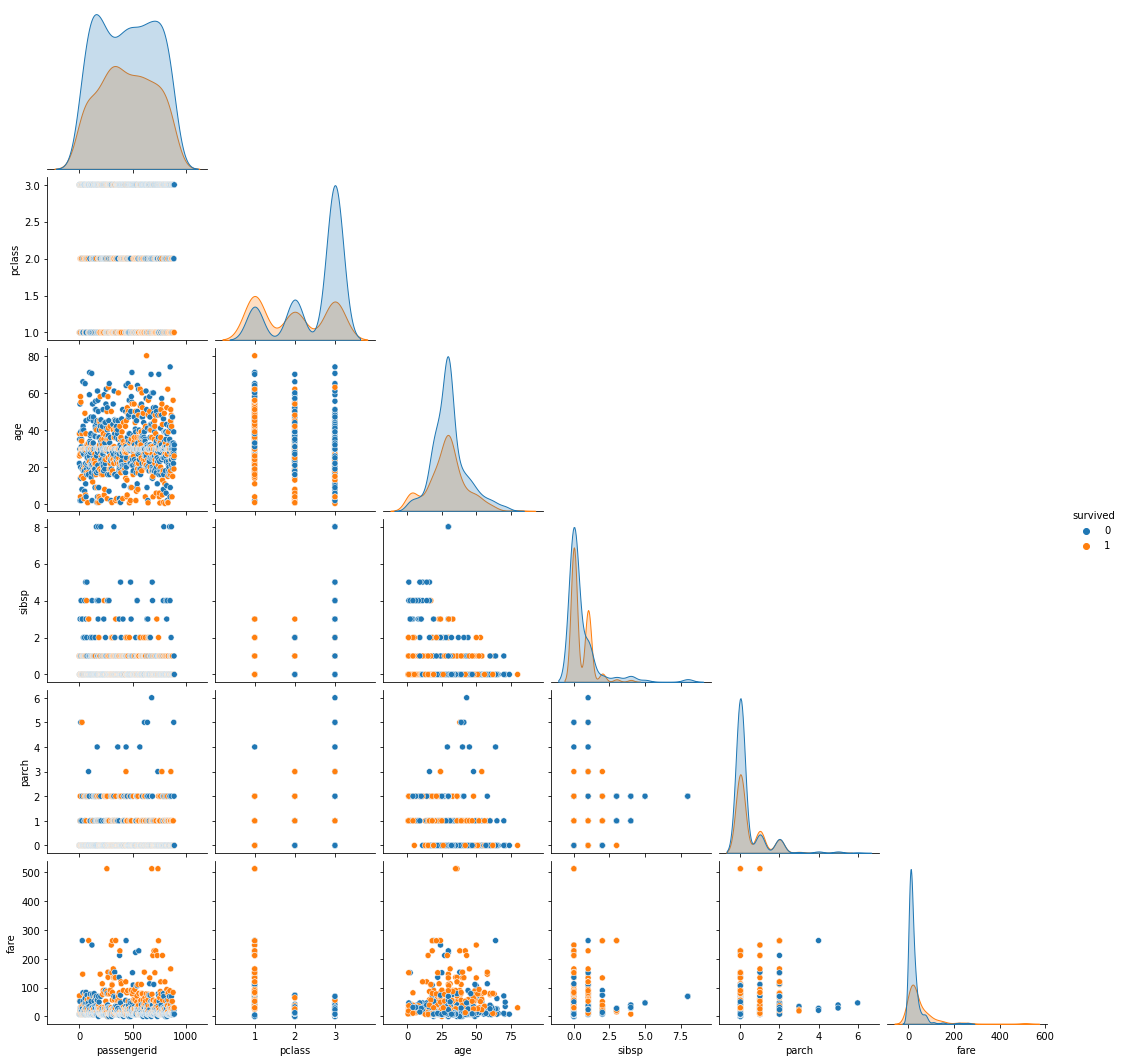

In [91]:
sns.pairplot(train, hue = "survived", corner = True);

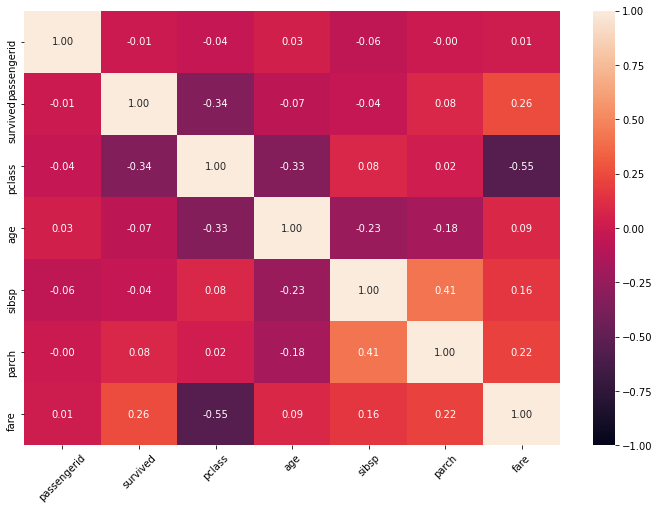

In [92]:
plt.figure(figsize = (12,8))
sns.heatmap (train.corr(), annot = True, fmt = '.2f', vmin = -1, vmax = 1)
plt.xticks(rotation = 45);

In [93]:
train.corr()['survived'].sort_values().drop('survived').iplot(kind = 'barh');

In [94]:
train_temp = train.corr()

count = 'Done'
feature =[]
collinear= []
for col in train_temp.columns:
    for i in train_temp.index:
        if (train_temp[col][i] > .9 and train_temp[col][i] < 1) or (train_temp[col][i] < -.9 and train_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                print(Fore.RED + f'\033[1mmulticolinearity alert in between\033[0m {col} - {i}')
        else:
            print(f'For {col} and {i}, there is NO multicollinearity problem') 

print('\033[1mThe number of strong corelated features:\033[0m', count) 

For passengerid and passengerid, there is NO multicollinearity problem
For passengerid and survived, there is NO multicollinearity problem
For passengerid and pclass, there is NO multicollinearity problem
For passengerid and age, there is NO multicollinearity problem
For passengerid and sibsp, there is NO multicollinearity problem
For passengerid and parch, there is NO multicollinearity problem
For passengerid and fare, there is NO multicollinearity problem
For survived and passengerid, there is NO multicollinearity problem
For survived and survived, there is NO multicollinearity problem
For survived and pclass, there is NO multicollinearity problem
For survived and age, there is NO multicollinearity problem
For survived and sibsp, there is NO multicollinearity problem
For survived and parch, there is NO multicollinearity problem
For survived and fare, there is NO multicollinearity problem
For pclass and passengerid, there is NO multicollinearity problem
For pclass and survived, there 

### Based on the examinations made above,

- There is no multicollinearity problem among the features.
- We have weak level correlation between the numerical features and the target column.
- Also there is weak level correlation between the columns.


### 2. Data Visualization

- Passanger Survived


We can search for answers to the following questions using data visualization methods. Based on these responses, we can develop comments about the factors that prediction of survived.

- How does the people status affect passenger survived ?
- How does people' ages affect passenger survived?
- How does people' gender affect passenger survived?

### Passenger Survived

Let's check how many passenger were survived ?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

In [95]:
train.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [96]:
# with plotly
train['survived'].value_counts().iplot(kind="bar", title = '"survived" Column Distribution')

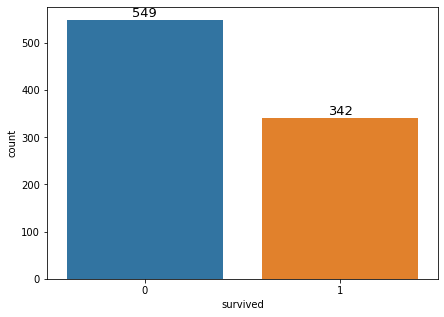

In [97]:
# with seaborn

plt.figure(figsize = (7,5))
sns.countplot(data = train, x = 'survived');
for index,value in enumerate(train.survived.value_counts()):
     plt.text(index, value, f'{value}', ha = 'center', va = 'bottom', fontsize = 13);

## 3. Data Pre-Processing

- Scaling
- Label Encoding
----------

#### Label Encoding

Lots of machine learning algorithms require numerical input data, so I need to represent categorical columns in a numerical column. In order to encode this data, I could map each value to a number. e.g. Sex column's value can be represented as Male: 1, Female: 0. This process is known as label encoding, and sklearn conveniently will do this for I using LabelEncoder.


In [98]:
train1 = train.drop('survived', axis = 1)
train1.head(1)

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,S


### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:

- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [99]:
train1.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000,1,0,PC 17599,71.283,C
2,3,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,S
4,5,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,S


In [100]:
train1 = pd.get_dummies(train1, columns = ['embarked'], drop_first = True)
train1.head(1)

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked_Q,embarked_S
0,1,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,0,1


In [101]:
train1['sex'].replace('male', 1,inplace=True)
train1['sex'].replace('female', 0, inplace=True)
train1.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked_Q,embarked_S
0,1,3,"Braund, Mr. Owen Harris",1,22.000,1,0,A/5 21171,7.250,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,38.000,1,0,PC 17599,71.283,0,0
2,3,3,"Heikkinen, Miss. Laina",0,26.000,0,0,STON/O2. 3101282,7.925,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000,1,0,113803,53.100,0,1
4,5,3,"Allen, Mr. William Henry",1,35.000,0,0,373450,8.050,0,1


In [102]:
train1.drop(['name', 'ticket', 'passengerid'], axis = 1, inplace = True)

In [103]:
train1.head()

,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S
0,3,1,22.000,1,0,7.250,0,1
1,1,0,38.000,1,0,71.283,0,0
2,3,0,26.000,0,0,7.925,0,1
3,1,0,35.000,1,0,53.100,0,1
4,3,1,35.000,0,0,8.050,0,1


In [104]:
scaler = MinMaxScaler()
scaler.fit(train1)


train1_scaled= scaler.transform(train1)

In [105]:
train1_scaled

array([[1.        , 1.        , 0.27117366, ..., 0.01415106, 0.        ,
        1.        ],
       [0.        , 0.        , 0.4722292 , ..., 0.13913574, 0.        ,
        0.        ],
       [1.        , 0.        , 0.32143755, ..., 0.01546857, 0.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.36792055, ..., 0.04577135, 0.        ,
        1.        ],
       [0.        , 1.        , 0.32143755, ..., 0.0585561 , 0.        ,
        0.        ],
       [1.        , 1.        , 0.39683338, ..., 0.01512699, 1.        ,
        0.        ]])

## Cluster Analysis¶

- Finded the optimal number of clusters (k) using the elbow method for for K-means.
- Determined the clusters by using K-Means then Evaluate predicted results.

****
- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

Let's find out the groups of passenger who survived. It is observed that the most important factor for any passenger to survived or died is gender and age in the travelling. So let's bunch them in the group of people using cluster analysis.

In [106]:
hop = hopkins(train1_scaled,train1.shape[0])
print(f"Hopkins Value : {hop} ")

Hopkins Value : 0.042553588385118725 


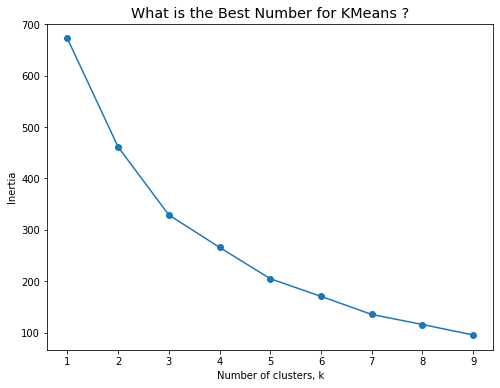

In [107]:
# First : Get the Best KMeans 

ks = range(1,10)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(train1_scaled)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(8, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

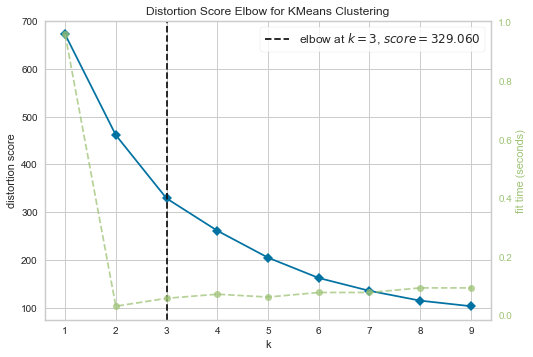

In [108]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,10))
visu.fit(train1_scaled)
visu.show();

In [109]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters = k)
    model.fit(train1_scaled)
    ssd.append(model.inertia_)
    print(f"Silhouette Score for {k} clusters : {silhouette_score(train1_scaled, model.labels_)}")

Silhouette Score for 2 clusters : 0.3765108626146559
Silhouette Score for 3 clusters : 0.4222802021043424
Silhouette Score for 4 clusters : 0.4739630736938558
Silhouette Score for 5 clusters : 0.47168458311015626
Silhouette Score for 6 clusters : 0.5103217314192955
Silhouette Score for 7 clusters : 0.5151729875990337
Silhouette Score for 8 clusters : 0.5366844572646675
Silhouette Score for 9 clusters : 0.5615758744695682


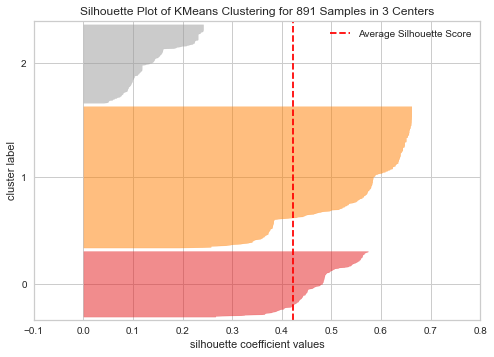

In [110]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model_3 = KMeans(n_clusters = 3, random_state = 101)
visualizer = SilhouetteVisualizer(model_3)

# Fit the data to the visualizer

visualizer.fit(train1_scaled)
visualizer.poof();

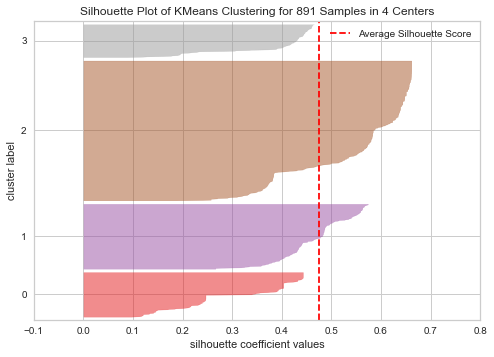

In [111]:
model_4 = KMeans(n_clusters = 4, random_state = 101)
visualizer = SilhouetteVisualizer(model_4)

# Fit the data to the visualizer

visualizer.fit(train1_scaled)    
visualizer.poof();

According to the silhouette score, clustering according to the K=3 and K=4 are seen above. For K=3, clustering is better. According to the Elbow method, the best K=3. Therefore, it will be continued as K=3.

In [112]:
k_means_model = KMeans(n_clusters = 3, random_state = 101)
k_means_model.fit_predict(train1_scaled)
labels = k_means_model.labels_
labels

array([1, 2, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 1,
       2, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2,
       2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 2, 0, 1, 1, 2, 2,
       0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2,
       1, 2, 1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 1,
       0, 0, 1, 2, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 2, 1,
       1, 2, 1, 1, 0, 2, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 2, 1,
       2, 0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2,
       1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 1, 1, 1, 0, 0, 1, 1, 0, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1, 2, 2,

In [113]:
train['predicted_clusters'] = labels
train

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,predicted_clusters
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000,1,0,PC 17599,71.283,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,S,1
5,6,0,3,"Moran, Mr. James",male,29.699,0,0,330877,8.458,Q,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000,0,0,17463,51.862,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000,0,2,347742,11.133,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000,1,0,237736,30.071,C,2


In [114]:
train['predicted_clusters'].value_counts()

1    441
2    245
0    205
Name: predicted_clusters, dtype: int64

In [115]:
fig = px.pie(train, values = train['predicted_clusters'].value_counts(),
                    names = train['predicted_clusters'].value_counts().index,
                    title = 'Predicted_Clusters Distribution')
fig.show()

In [116]:
fig = px.pie(train, values = train[train['survived'] == 1]['predicted_clusters'].value_counts(),
                    names = train[train['survived'] == 1]['predicted_clusters'].value_counts().index,
                    title = 'Predicted_Clusters & Survived == 1 Distribution')
fig.show()

In [117]:
fig = px.pie(train, values = train[train['survived'] == 0]['predicted_clusters'].value_counts(),
                    names = train[train['survived'] == 0]['predicted_clusters'].value_counts().index,
                    title = 'Predicted_Clusters & Survived == 0 Distribution')
fig.show()

In [118]:
pd.crosstab(train['survived'], 
            train['predicted_clusters']).iplot(kind="bar", title = 'Compare (Survived vs Predicted-Clusters)',
            xTitle = 'Survived & Clusters', yTitle = 'Counts')

In [119]:
train.groupby('survived').mean()

,passengerid,pclass,age,sibsp,parch,fare,predicted_clusters
survived,,,,,,,
0,447.016,2.532,30.415,0.554,0.330,22.118,1.107
1,444.368,1.950,28.550,0.474,0.465,48.395,0.944


In [120]:
train.groupby(['survived','predicted_clusters']).mean()

passengerid  pclass    age  sibsp  parch   fare
survived predicted_clusters                                                 
0        0                       419.460   2.841 25.492  1.476  1.127 25.729
         1                       455.132   2.495 30.917  0.462  0.214 19.881
         2                       437.033   2.484 31.460  0.352  0.262 26.927
1        0                       447.352   1.894 29.327  0.542  0.627 45.095
         1                       451.558   2.078 26.773  0.390  0.364 30.366
         2                       436.423   1.935 28.765  0.447  0.341 63.492

In [121]:
pd.crosstab(train['predicted_clusters'], 
            train['survived']).iplot(kind="bar", title = 'Compare (predicted_clusters vs survived)',
            xTitle = 'predicted_clusters & survived', yTitle = 'Counts')

In [122]:
train.groupby('predicted_clusters').mean()

,passengerid,survived,pclass,age,sibsp,parch,fare
predicted_clusters,,,,,,,
0,438.780,0.693,2.185,28.148,0.829,0.780,39.143
1,454.508,0.175,2.422,30.193,0.449,0.240,21.712
2,436.727,0.502,2.208,30.107,0.400,0.302,45.284


## Model Building

- Split Data as Train and Test set
- Built Gradient Boosting Classifier, Evaluate Model Performance and Predict Test Data
- Built K Neighbors Classifier and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data

**Evaluating Model Performance**

***Confusion Matrix*** : I used scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

***Yellowbrick*** : Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

### Split Data as Train and Test Set

In [123]:
train1.head(1)

,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S
0,3,1,22.000,1,0,7.250,0,1


In [130]:
test1.head(1)

,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S
0,3,1,34.500,0,0,7.829,1,0


In [132]:
X_train = train1
y_train = train['survived']
X_test = test1


In [139]:
# Logistics Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

80.02

In [140]:
coeff_df = pd.DataFrame(train1.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
5,embarked_Q,0.478
6,embarked_S,-0.068
4,fare,-0.418
3,parch,-1.433
0,sex,-1.995
2,sibsp,-2.118
1,age,-2.553


In [162]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train),2)
acc_svc

0.81

In [163]:
# k-Nearest Neighbors (KNN)

knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

knn_model_acc = round(knn_model.score(X_train, y_train),2)
knn_model_acc

0.88

In [165]:
# Gaussian Naive Bayes

gaussian_model = GaussianNB()
gaussian_model.fit(X_train, y_train)
y_pred = gaussian_model.predict(X_test)
acc_gaussian_model = round(gaussian_model.score(X_train, y_train), 2)
acc_gaussian_model

0.79

In [ ]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron